Epoch 1/20
290/290 [==============================] - 10s 12ms/step - loss: 0.1565 - val_loss: 0.0289
Epoch 2/20
290/290 [==============================] - 2s 8ms/step - loss: 0.0272 - val_loss: 0.0268
Epoch 3/20
290/290 [==============================] - 2s 8ms/step - loss: 0.0274 - val_loss: 0.0282
Epoch 4/20
290/290 [==============================] - 3s 9ms/step - loss: 0.0261 - val_loss: 0.0258
Epoch 5/20
290/290 [==============================] - 3s 10ms/step - loss: 0.0255 - val_loss: 0.0253
Epoch 6/20
290/290 [==============================] - 3s 10ms/step - loss: 0.0247 - val_loss: 0.0229
Epoch 7/20
290/290 [==============================] - 3s 11ms/step - loss: 0.0240 - val_loss: 0.0231
Epoch 8/20
290/290 [==============================] - 3s 11ms/step - loss: 0.0230 - val_loss: 0.0218
Epoch 9/20
290/290 [==============================] - 3s 11ms/step - loss: 0.0224 - val_loss: 0.0207
Epoch 10/20
290/290 [==============================] - 3s 11ms/step - loss: 0.0216 - val_loss

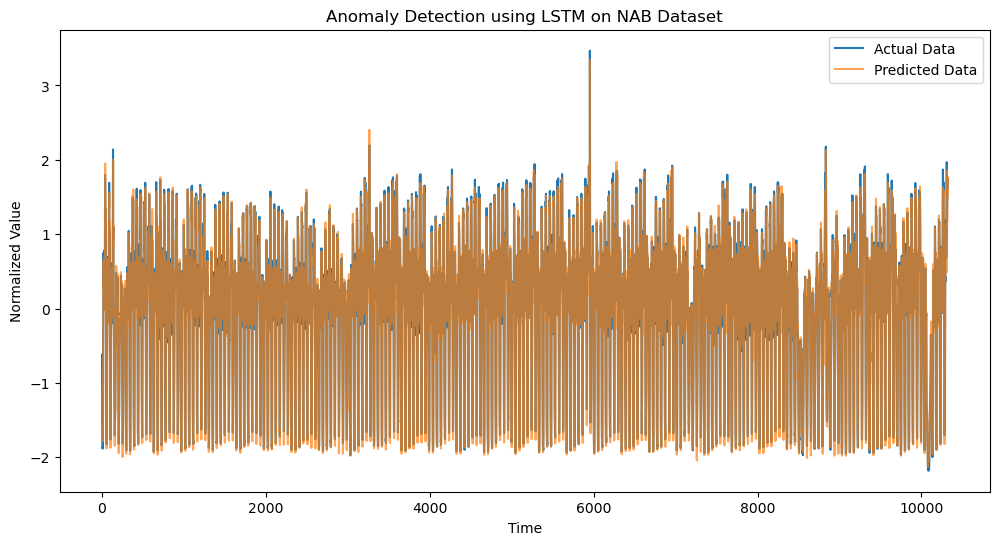

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import matplotlib.pyplot as plt

# Load NAB dataset (you can replace this with your dataset)
nab_dataset_url = "https://raw.githubusercontent.com/numenta/NAB/master/data/realKnownCause/nyc_taxi.csv"
df = pd.read_csv(nab_dataset_url)
data = df['value'].values.reshape(-1, 1)

# Normalize the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(data)

# Create sequences for training
sequence_length = 10
X, y = [], []
for i in range(len(normalized_data) - sequence_length):
    X.append(normalized_data[i:i + sequence_length, 0])
    y.append(normalized_data[i + sequence_length, 0])
X, y = np.array(X), np.array(y)

# Reshape the data for LSTM input: (samples, time steps, features)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Build and train the LSTM model
model_anomaly_detection = Sequential()
model_anomaly_detection.add(LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)))
model_anomaly_detection.add(LSTM(50, return_sequences=False))
model_anomaly_detection.add(Dense(1))
model_anomaly_detection.compile(optimizer='adam', loss='mean_squared_error')

history_anomaly_detection = model_anomaly_detection.fit(X, y, epochs=20, batch_size=32, validation_split=0.1, verbose=1)

# Predictions on the entire dataset
predictions = model_anomaly_detection.predict(X)

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(normalized_data, label='Actual Data')
# plot the predictions with lesser alpha
plt.plot(np.arange(sequence_length, sequence_length + len(predictions)), predictions, label='Predicted Data', alpha=0.7)
plt.xlabel('Time')
plt.ylabel('Normalized Value')
plt.title('Anomaly Detection using LSTM on NAB Dataset')
plt.legend()
plt.show()